In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [39]:
os.makedirs('csv_files', exist_ok=True)
os.makedirs('outputs', exist_ok=True)

In [40]:
# Load the datasets
fear_greed_df = pd.read_csv("/content/ds_shrey_raut/csv_files/fear_greed_index.csv")
historical_data_df = pd.read_csv("/content/ds_shrey_raut/csv_files/historical_data.csv")

In [41]:
# Data Cleaning & Preprocessing
# Convert date columns to datetime objects for merging
fear_greed_df['date'] = pd.to_datetime(fear_greed_df['date'])
historical_data_df['Date'] = pd.to_datetime(historical_data_df['Timestamp IST'], format='%d-%m-%Y %H:%M').dt.date

In [42]:
# Simplify sentiment classification
fear_greed_df['classification_simplified'] = fear_greed_df['classification'].apply(
    lambda x: 'Fear' if 'Fear' in x else ('Greed' if 'Greed' in x else 'Neutral')
)
fear_greed_df['date'] = fear_greed_df['date'].dt.date

In [43]:
# Merge the dataframes on the date
merged_df = pd.merge(historical_data_df, fear_greed_df, left_on='Date', right_on='date', how='inner')

In [44]:
# Perform Analysis: Group by sentiment and aggregate key metrics
sentiment_analysis = merged_df.groupby('classification_simplified').agg(
    Average_Closed_PnL=('Closed PnL', 'mean'),
    Total_Volume_USD=('Size USD', 'sum'),
    Total_Trades=('Account', 'count')
).reset_index()

In [51]:
# Save the processed data to the csv_files directory
sentiment_analysis.to_csv('/content/ds_shrey_raut/csv_files/sentiment_analysis.csv', index=False)
print("Saved 'sentiment_analysis.csv' to the 'csv_files' directory.")

Saved 'sentiment_analysis.csv' to the 'csv_files' directory.


Saved 'enhanced_pnl_by_sentiment.png' to the 'outputs' directory.


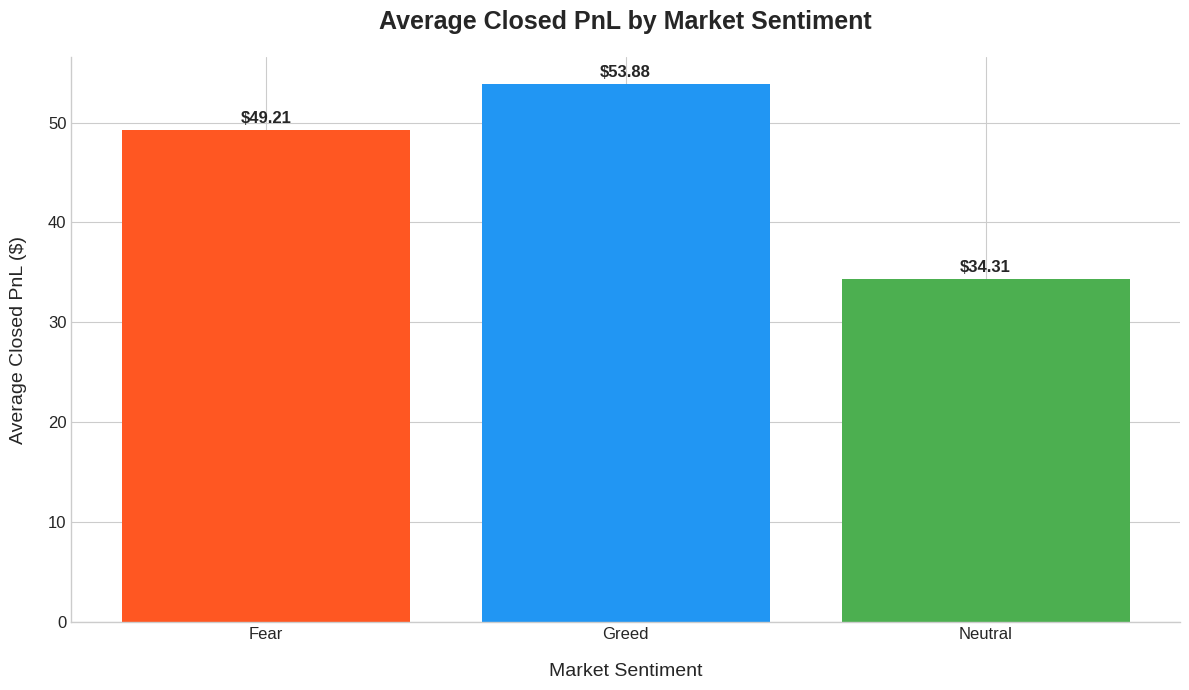

Saved 'enhanced_volume_by_sentiment.png' to the 'outputs' directory.


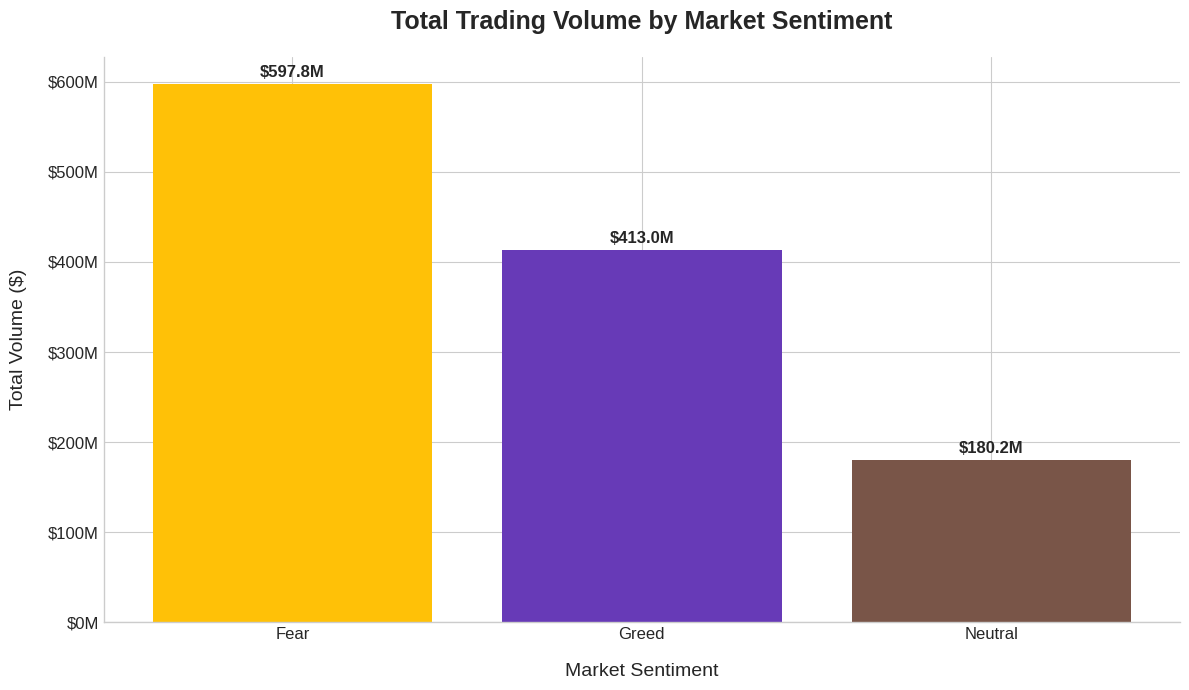


Analysis complete. Your project files have been saved.


In [50]:
# --- Data Visualization: Create and save plots to the outputs directory ---
# Use a professional style for the plots
plt.style.use('seaborn-v0_8-whitegrid')

# Bar chart for Average Closed PnL
# Explicitly close any existing figures before creating a new one
plt.close('all')

fig, ax = plt.subplots(figsize=(12, 7))

# Define a color palette
colors = ['#FF5722', '#2196F3', '#4CAF50']
bars = ax.bar(
    sentiment_analysis['classification_simplified'],
    sentiment_analysis['Average_Closed_PnL'],
    color=colors
)

ax.set_title('Average Closed PnL by Market Sentiment', fontsize=18, fontweight='bold', pad=20)
ax.set_xlabel('Market Sentiment', fontsize=14, labelpad=15)
ax.set_ylabel('Average Closed PnL ($)', fontsize=14, labelpad=15)

# Add data labels on top of the bars
for bar in bars:
    height = bar.get_height()
    ax.annotate(
        f'${height:.2f}',
        xy=(bar.get_x() + bar.get_width() / 2, height),
        xytext=(0, 3),  # 3 points vertical offset
        textcoords="offset points",
        ha='center',
        va='bottom',
        fontsize=12,
        fontweight='bold'
    )

ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# Remove the top and right spines for a cleaner look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig('/content/ds_shrey_raut/outputs/pnl_by_sentiment.png', dpi=300)
print("Saved 'enhanced_pnl_by_sentiment.png' to the 'outputs' directory.")
plt.show()

# Bar chart for Total Trading Volume
# Explicitly close any existing figures before creating a new one
plt.close('all')

fig, ax = plt.subplots(figsize=(12, 7))

# Define a color palette
colors = ['#FFC107', '#673AB7', '#795548']
bars = ax.bar(
    sentiment_analysis['classification_simplified'],
    sentiment_analysis['Total_Volume_USD'],
    color=colors
)

ax.set_title('Total Trading Volume by Market Sentiment', fontsize=18, fontweight='bold', pad=20)
ax.set_xlabel('Market Sentiment', fontsize=14, labelpad=15)
ax.set_ylabel('Total Volume ($)', fontsize=14, labelpad=15)

# Format y-axis to be in millions ($M)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'${x/1e6:.0f}M'))

# Add data labels on top of the bars
for bar in bars:
    height = bar.get_height()
    ax.annotate(
        f'${height/1e6:.1f}M',
        xy=(bar.get_x() + bar.get_width() / 2, height),
        xytext=(0, 3),  # 3 points vertical offset
        textcoords="offset points",
        ha='center',
        va='bottom',
        fontsize=12,
        fontweight='bold'
    )

ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# Remove the top and right spines for a cleaner look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig('/content/ds_shrey_raut/outputs/volume_by_sentiment.png', dpi=300)
print("Saved 'enhanced_volume_by_sentiment.png' to the 'outputs' directory.")
plt.show()

print("\nAnalysis complete. Your project files have been saved.")
